# Group

Christine Pham, Hayden Bustos, Rachel Le,
John Aguinaga, Bavithra Lakshmanasamy


# EDA with Feature engineered Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# Loading the Dataset
folder_path = "/Users/bxl2360/Desktop/feature_engineer_df (1).csv"
df = pd.read_csv(folder_path)
df.head()

,Cst_Cnt,lat_block,lon_block,frequency_N2,new_depthm
0,1,5,9,0.000008,4.0
1,1,5,9,-0.000011,9.0
2,1,5,9,-0.000012,14.5
3,1,5,9,0.000007,19.5
4,1,5,9,0.000007,25.0


In [ ]:
df.shape

(556862, 5)

### Summary of statistics

In [ ]:
summary_stats = df.describe()
summary_stats

,Cst_Cnt,lat_block,lon_block,frequency_N2,new_depthm
count,556862.000000,556862.000000,556862.000000,533031.000000,533031.000000
mean,12271.867003,3.753698,9.540272,0.000069,245.126201
std,7075.545980,0.877661,0.977866,0.000124,338.046559
min,1.000000,1.000000,1.000000,-0.022444,0.500000
25%,6770.000000,3.000000,9.000000,0.000013,50.500000
50%,12054.000000,4.000000,10.000000,0.000030,137.500000
75%,18398.000000,4.000000,10.000000,0.000096,313.000000
max,24814.000000,7.000000,12.000000,0.013183,5275.500000


### Data Distribution Visualization

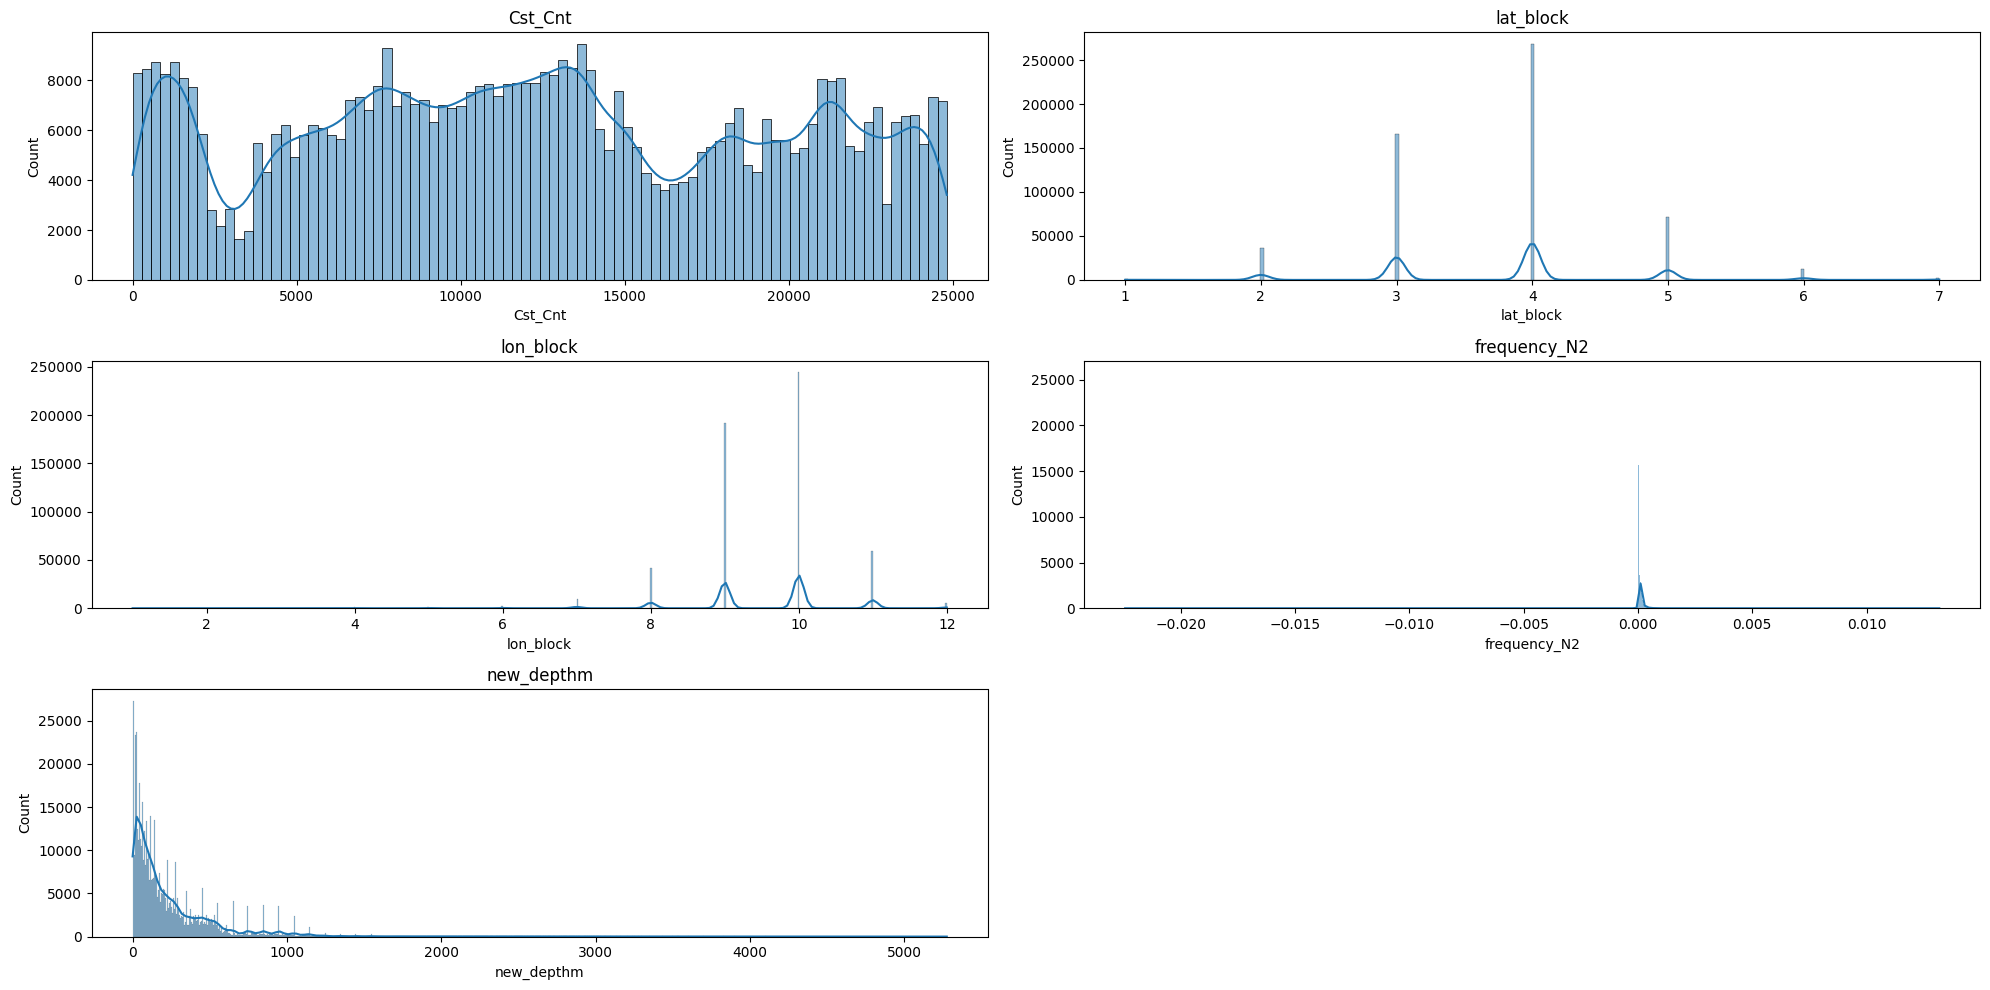

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


### Correlation Analysis

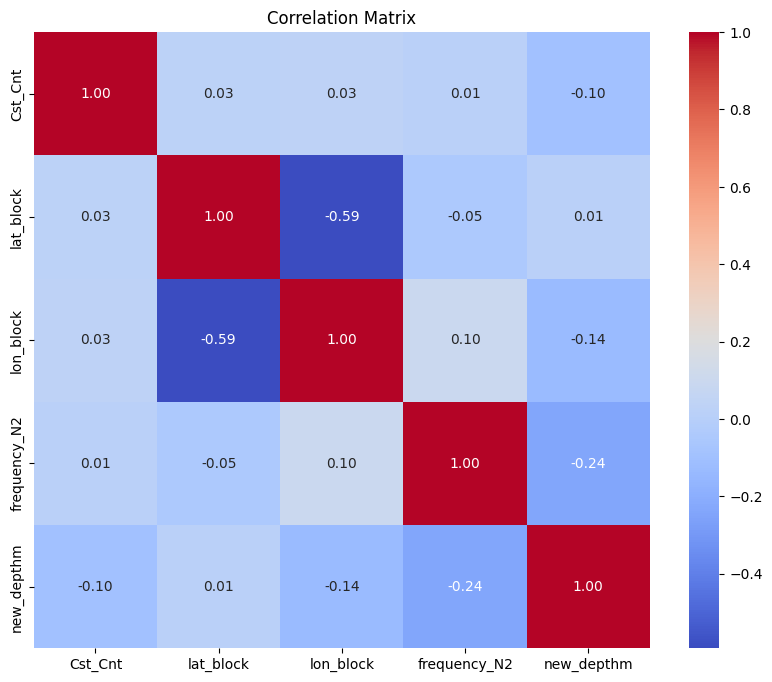

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

### Scatter plots

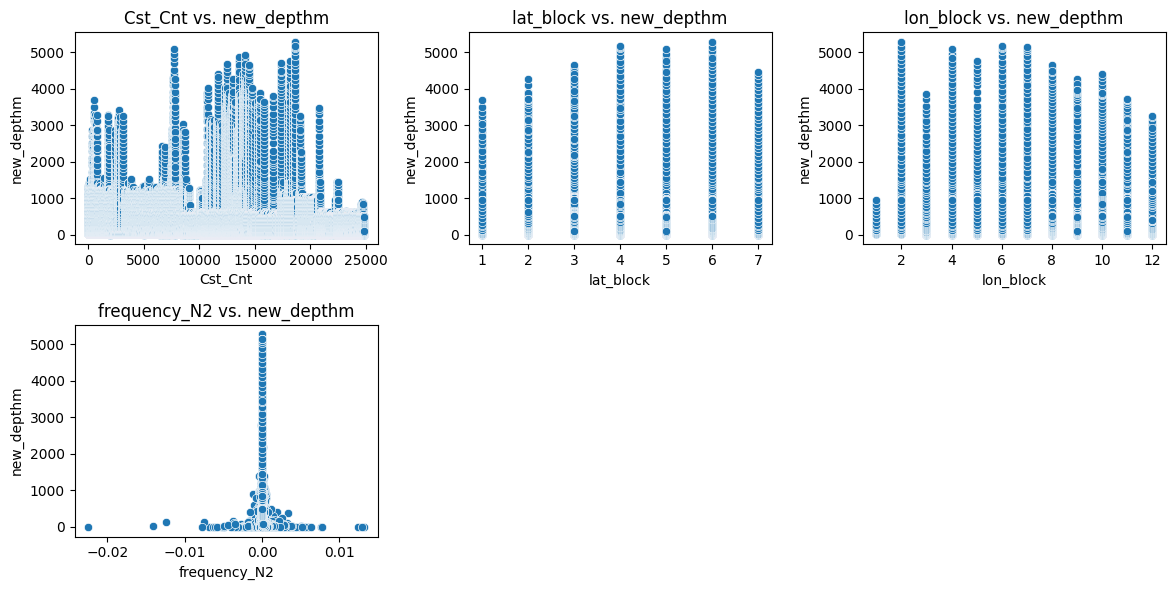

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):  # Excluding the target variable
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=col, y='new_depthm', data=df)
    plt.title(f'{col} vs. new_depthm')
plt.tight_layout()
plt.show()

### Missing Values Analysis

In [ ]:
missing_values = df.isnull().sum()
missing_values

Cst_Cnt             0
lat_block           0
lon_block           0
frequency_N2    23831
new_depthm      23831
dtype: int64

In [ ]:
#Dropping..

df.dropna(inplace=True)

# Checking missing values after dropping
missing_values_after_drop = df.isnull().sum()
print(missing_values_after_drop)

Cst_Cnt         0
lat_block       0
lon_block       0
frequency_N2    0
new_depthm      0
dtype: int64


It's important to understand why these values are missing and decide on an appropriate strategy for handling them, such as imputation or removal, before proceeding with further analysis or modeling

### Outlier Detection

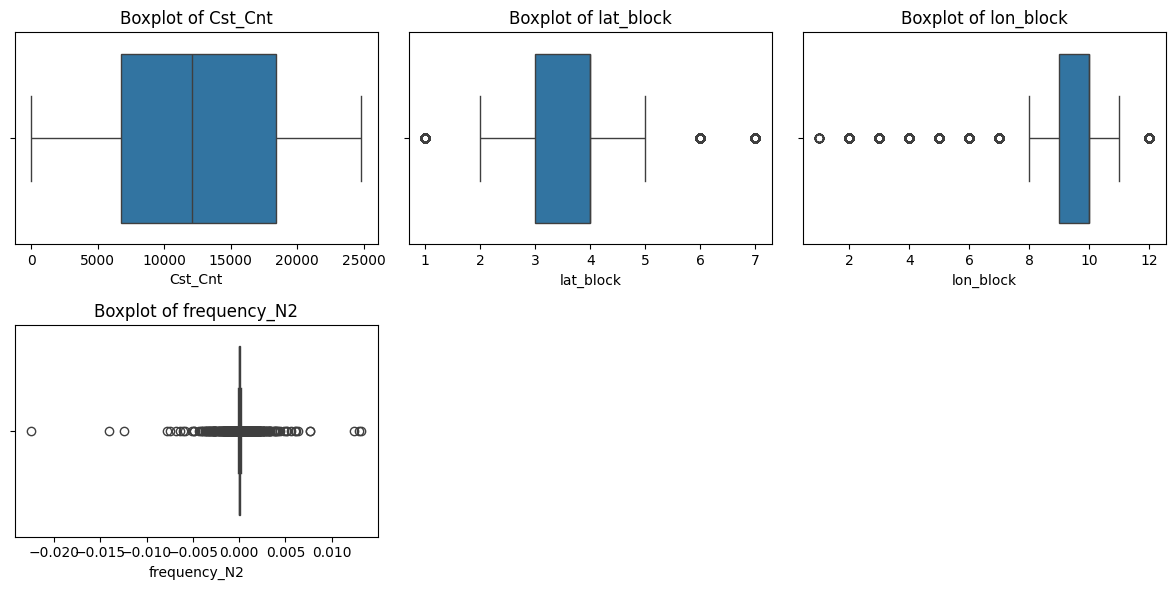

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):  # Excluding the target variable
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Feature Engineering Validation

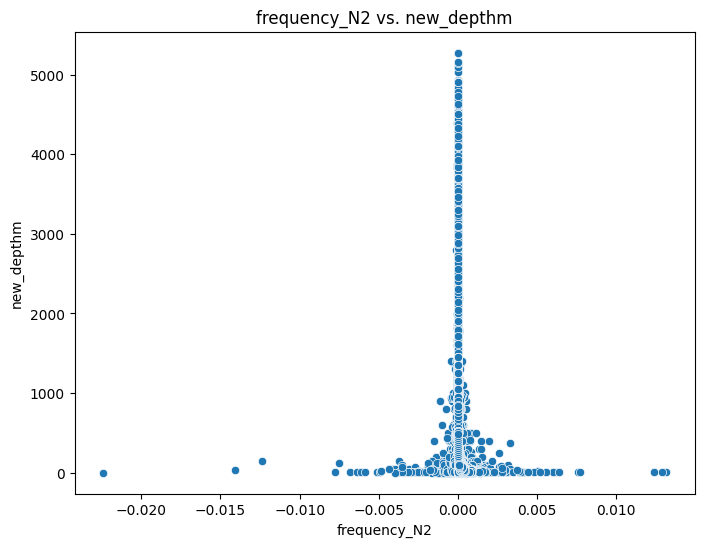

Correlation coefficient between frequency_N2 and new_depthm: -0.24020264503748925


In [ ]:
# Feature engineering validation - scatter plots or correlation coefficients
plt.figure(figsize=(8, 6))
sns.scatterplot(x='frequency_N2', y='new_depthm', data=df)
plt.title('frequency_N2 vs. new_depthm')
plt.show()

# You can also calculate correlation coefficients
correlation_frequency_N2 = df['frequency_N2'].corr(df['new_depthm'])
print("Correlation coefficient between frequency_N2 and new_depthm:", correlation_frequency_N2)


### Data Visualization by Latitude Block

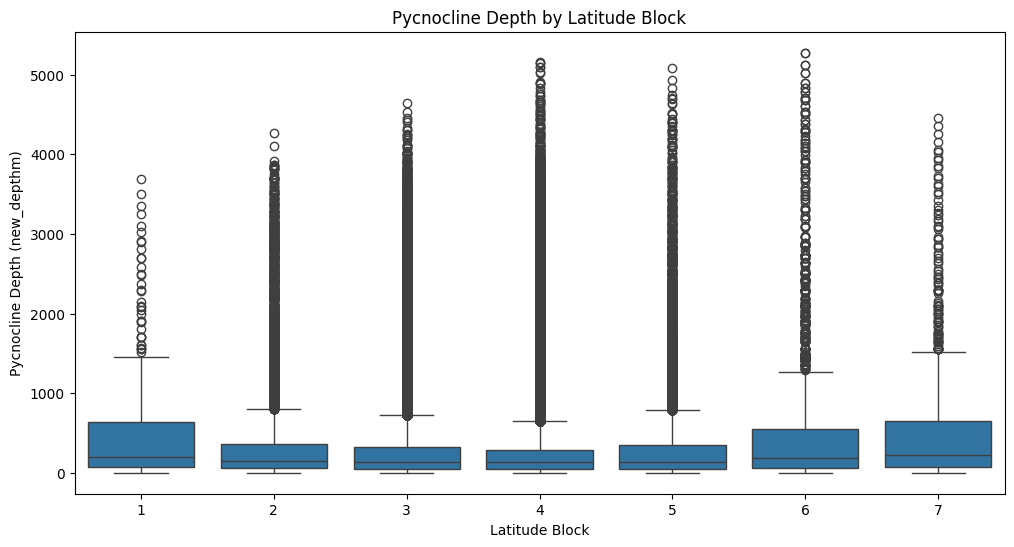

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='lat_block', y='new_depthm', data=df)
plt.title('Pycnocline Depth by Latitude Block')
plt.xlabel('Latitude Block')
plt.ylabel('Pycnocline Depth (new_depthm)')
plt.show()

XGBoost is capable of capturing complex nonlinear relationships between features and the target variable. This is beneficial in scenarios where the relationship between input features and the target variable is not linear, as is often the case in real-world datasets.

In [ ]:
# 'new_depthm' is the target variable
X = df.drop(columns=['new_depthm'])
y = df['new_depthm']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [198.71695242 198.25922629 196.70062217 194.1433803  197.79215039]
Mean RMSE: 197.1224663127679


In [ ]:
# Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=4, n_e

In [ ]:
# Model Evaluation
y_pred = xgb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on the testing set:", mae)
print("Mean Squared Error (MSE) on the testing set:", mse)

Mean Absolute Error (MAE) on the testing set: 97.7838265037579
Mean Squared Error (MSE) on the testing set: 39821.52365180314


### Additional Evaluation Metrics...

In [ ]:
# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Adjusted R-squared
def adjusted_r_squared(y_true, y_pred, n, p):
    r_squared = r2_score(y_true, y_pred)
    adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    return adj_r_squared

adjusted_r2 = adjusted_r_squared(y_test, y_pred, len(y_test), X_test.shape[1])
print("Adjusted R-squared:", adjusted_r2)


Explained Variance Score: 0.6556234373825709
Mean Absolute Percentage Error (MAPE): 618.8084131114874
Adjusted R-squared: 0.6556105124215352
